# Main paper figures notebook

this notebook will allow you to recreate the figures in the main paper

the code for this is found under src.utils.make_primary_figures, I have copied the functions here so that you may examine them before running them. I have added notes where the figures were combined or adjusted in a separate program

In [1]:
import src.utils.utils as utils
import src.utils.dataset_utils as ds_utils
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import seaborn as sns

datadir = '/mnt/data/processed/experiment_2'

In [2]:
data_dict = ds_utils.load_exp_data(datadir)

slider_dict = data_dict["slider_dict"]
model_mat_fits = data_dict["model_mat_fits"]
melted_mmf = data_dict["melted_mmf"]
w1_map_df = data_dict["w1_map_df"]
grouped_stakes = data_dict["grouped_stakes"]
pca_df = data_dict["pca_df"]
dprime_df = data_dict["dprime_df"]

def set_palettes(): # helper function for palettes
    """
    Code to set up the palettes for use in other figures
    :return: returns a tuple with 3 palettes for use in the other figures (most commonly talking_heads palette)
    """
    w4_palette = ["#9e9ac8", "#756bb1", "#fb6a4a", "#de2d26"]
    talking_heads = ["#6095ca", "#fbb91e", "#6aaf75"]
    # mem_palette = ['#e6508b', '#70AF41']
    mem_palette = ["#a7a9ab", "#666a70"]
    return w4_palette, talking_heads, mem_palette

/mnt/src/utils/dataset_utils.py:584: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  good_stakes.groupby(["subid"])["points", "rews_together", "rt_1", "rt_2"]


---
## Figure 2: Model matrices and example participants

This code produces the main scaffolding of figure 2, only the object display is added in a separate program

In [3]:
def set_palettes():
    """
    Code to set up the palettes for use in other figures
    :return: returns a tuple with 3 palettes for use in the other figures (most commonly talking_heads palette)
    """
    w4_palette = ["#9e9ac8", "#756bb1", "#fb6a4a", "#de2d26"]
    talking_heads = ["#6095ca", "#fbb91e", "#6aaf75"]
    # mem_palette = ['#e6508b', '#70AF41']
    mem_palette = ["#a7a9ab", "#666a70"]
    return w4_palette, talking_heads, mem_palette


def make_figure_2(slider_dict, output_path):
    """
    Makes the 2nd figure which is the comparison of model matrices and example participants
    :param slider_dict: takes in the slider dictionary where the example participants are stored
    :param output_path: where to save the figure pdf
    """
    vc_sub = "AAURS65ZO4SXC"
    dr_sub = "ATKNH6OR2G11O"
    ir_sub = "AUFUUD4WG9CVO"
    model_mats = utils.create_model_matrices()
    empty_label = [""] * 10
    fontsize = 16
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))
    im = axs[0, 0].matshow(model_mats[0], interpolation="nearest")
    axs[0, 0].set_title("Visual cooccurrence", fontsize=fontsize)

    axs[0, 1].matshow(model_mats[2], interpolation="nearest")
    axs[0, 1].set_title("Direct item association", fontsize=fontsize)

    axs[0, 2].matshow(model_mats[3], interpolation="nearest")
    axs[0, 2].set_title("Indirect item association", fontsize=fontsize)

    # Setting participant specific portion
    vc_post_minus_pre = slider_dict[vc_sub][1][1] - slider_dict[vc_sub][1][0]
    np.fill_diagonal(vc_post_minus_pre, 100)
    axs[1, 0].matshow(vc_post_minus_pre, interpolation="nearest")

    axs[1, 0].set_title("Participant 1", fontsize=fontsize)

    dr_post_minus_pre = slider_dict[dr_sub][1][1] - slider_dict[dr_sub][1][0]
    np.fill_diagonal(dr_post_minus_pre, 100)
    axs[1, 1].matshow(dr_post_minus_pre, interpolation="nearest")

    axs[1, 1].set_title("Participant 2", fontsize=fontsize)

    ir_post_minus_pre = slider_dict[ir_sub][1][1] - slider_dict[ir_sub][1][0]
    np.fill_diagonal(ir_post_minus_pre, 100)
    axs[1, 2].matshow(ir_post_minus_pre, interpolation="nearest")

    axs[1, 2].set_title("Participant 3", fontsize=fontsize)
    for i in [0, 1]:
        for j in [0, 1, 2]:
            axs[i, j].tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,
                left=False,  # ticks along the top edge are off
                labelbottom=False,
            )
            axs[i, j].set_yticklabels(empty_label)
            axs[i, j].set_xticklabels(empty_label)

    # axs[0, 2].yaxis.set_label_position("right")
    axs[0, 0].set_ylabel("Model matrices", fontsize=fontsize, labelpad=30)
    # axs[1, 2].yaxis.set_label_position("right")
    axs[1, 0].set_ylabel("Example participants", fontsize=fontsize, labelpad=30)
    fig.text(0.05, 0.99, "A", fontsize=fontsize + 10, color="black", weight="bold")
    fig.text(0.37, 0.99, "B", fontsize=fontsize + 10, color="black", weight="bold")
    fig.text(0.67, 0.99, "C", fontsize=fontsize + 10, color="black", weight="bold")
    fig.text(0.05, 0.45, "D", fontsize=fontsize + 10, color="black", weight="bold")
    fig.text(0.37, 0.45, "E", fontsize=fontsize + 10, color="black", weight="bold")
    fig.text(0.67, 0.45, "F", fontsize=fontsize + 10, color="black", weight="bold")
    
    # axins = inset_axes(
    #     axs[1, 2], width="5%", height="100%", loc="center right", borderpad=-5,
    # )
    [[x00, y00], [x01, y01]] = axs[0, 2].get_position().get_points()
    [[x10, y10], [x11, y11]] = axs[1, 2].get_position().get_points()
    pad = 0.14
    width = 0.02
    cbar_ax = fig.add_axes([x11 + pad, y10, width, y01 - y10])
    axcb = fig.colorbar(im, cax=cbar_ax)
    # cb = fig.colorbar(im, ax=[axs[0, 2], axs[1, 2]], pad=8)
    axcb.set_label("Similarity", labelpad=-55, fontsize=fontsize - 2)
    fig.tight_layout()
    # uncomment the following two lines if you want to save the figure
    #filename = os.path.join(output_path, "Fig2.pdf")
    #fig.savefig(filename, dpi=300, transparent=True, bbox_inches="tight") 

/tmp/ipykernel_63/3076677583.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_yticklabels(empty_label)
/tmp/ipykernel_63/3076677583.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels(empty_label)
/tmp/ipykernel_63/3076677583.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


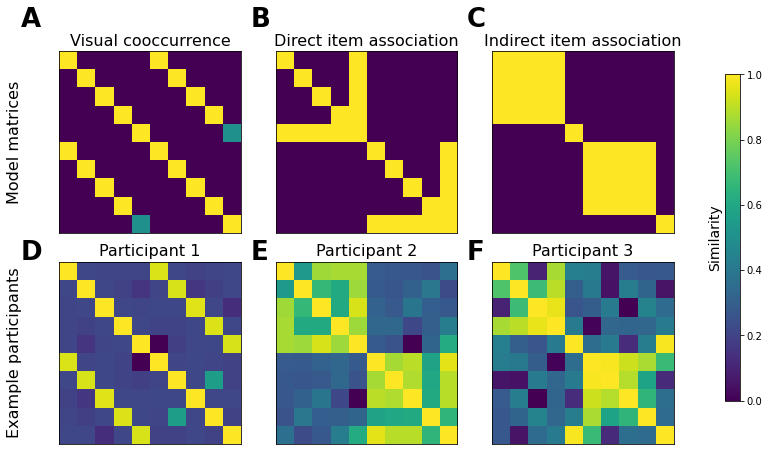

In [4]:
make_figure_2(slider_dict, 'replace_this_with_output_path_if_save')

---
## Figure 3: Model matrix fits

These two figures produced below were recombined in keynote 

In [5]:
def make_figure_3(model_mat_fits, melted_mmf, output_path, exp):
    """
    Makes the figure of beta coefficient fits for the multiple regressions for the model matrix fits
    :param model_mat_fits: dataframe containing model matrix fits from the multiple regression from each participant
    :param melted_mmf: dataframe of model matrix fits for the upper - lower beta values
    :param output_path: where to save the figure pdf
    :param exp: which experiment you want (1 for initial, 2 for primary results in paper)
    """
    y, talking_heads, _ = set_palettes()
    fontsize = 14
    height = 5.4
    model_melt = model_mat_fits.melt(
        id_vars=["subid", "high_arm"], var_name="state", value_name="coef"
    )
    # making figure 3A
    g = sns.catplot(
        data=model_melt,
        x="state",
        y="coef",
        kind="strip",
        height=height,
        palette=talking_heads,
    )
    ax = sns.pointplot(
        data=model_melt,
        y="coef",
        x="state",
        color="black",
        join=False,
        ci=95,
        scale=0.7,
    )
    custom_label = [
        "Visual cooccurrence",
        "Direct item association",
        "Indirect item association",
    ]
    # custom_label = ['', '', '']
    plt.title("behRSA model matrix fits", y=1.1, fontsize=fontsize)
    # adding zero line
    plt.setp(ax.lines, zorder=100)
    plt.setp(ax.collections, zorder=100, label="")

    plt.axhline(0, linestyle="--", color="red", zorder=120)
    # plotting significance asterisks
    plt.text(
        0,
        ax.get_ylim()[1],
        "*",
        ha="center",
        color="black",
        fontsize=fontsize + 6,
        weight="bold",
    )
    plt.text(
        1,
        ax.get_ylim()[1],
        "*",
        ha="center",
        color="black",
        fontsize=fontsize + 6,
        weight="bold",
    )
    plt.text(
        2,
        ax.get_ylim()[1],
        "*",
        ha="center",
        color="black",
        fontsize=fontsize + 6,
        weight="bold",
    )
    g.set_xticklabels(custom_label, rotation=30, fontsize=fontsize)
    round_ticks = [int(x) for x in g.axes[0, 0].get_yticks()]
    g.set_yticklabels(round_ticks, fontsize=fontsize)
    g.set_ylabels(r"Model matrix fit ($\bar{\beta}$)", fontsize=fontsize)
    g.set_xlabels("")
    g.fig.set_facecolor("w")
    g.fig.text(0, 1.05, "A", fontsize=fontsize + 10, weight="bold")
    # uncomment two lines below to save fig3A
    # filename_fig_3a = os.path.join(output_path, "Fig3A.pdf") 
    # g.savefig(filename_fig_3a, facecolor="w", dpi=300)
    # making figure 3B
    g2 = sns.catplot(
        data=melted_mmf,
        x="coef",
        y="value",
        kind="strip",
        height=height,
        palette=talking_heads,
    )
    ax = sns.pointplot(
        data=melted_mmf,
        x="coef",
        y="value",
        color="black",
        join=False,
        ci=95,
        scale=0.7,
    )
    plt.title(
        "Difference score between high-reward and low-reward", y=1.1, fontsize=fontsize
    )
    # adding zero line
    plt.setp(ax.lines, zorder=100)
    plt.setp(ax.collections, zorder=100, label="")
    plt.axhline(0, linestyle="--", color="red", zorder=120)
    # plotting significance asterisk
    if exp == 2:
        plt.text(
            2, 93, "*", ha="center", color="black", fontsize=fontsize + 6, weight="bold"
        )
    g2.set_xticklabels(custom_label, rotation=30, fontsize=fontsize)
    round_ticks = [int(x) for x in g.axes[0, 0].get_yticks()]
    g2.set_yticklabels(round_ticks, fontsize=fontsize)
    g2.set_ylabels(
        r"High stake context ($\bar{\beta}$) - Low stake context ($\bar{\beta}$)",
        fontsize=fontsize,
    )
    g2.set_xlabels("")
    g2.fig.set_facecolor("w")
    g2.fig.text(-0.01, 1.05, "B", fontsize=fontsize + 10, weight="bold")
    # uncomment two lines below to save fig3B
    # filename_fig_3b = os.path.join(output_path, "Fig3B.pdf")
    # g2.savefig(filename_fig_3b, facecolor="w", dpi=300)
    return g, g2

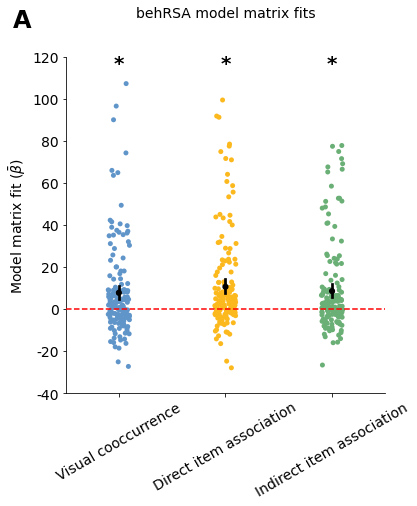

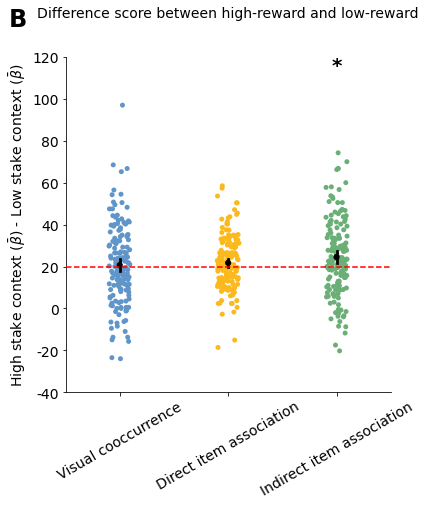

In [6]:
g, g2 = make_figure_3(model_mat_fits, melted_mmf, 'replace_this_with_output_path_if_save', 2)

---
## Figure 4: Principal components analysis of similarity ratings

In [7]:
def make_figure_4(pca_df, output_path):
    """
    Generates figure 3 which is the similarity matrices for the principle component dimensions
    :param pca_df: dataframe that contains the pca analysis results
    :param output_path: where to save figure pdf
    """
    lower_indices = np.tril_indices(10, -1, 10)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 16))
    fontsize = 24
    # fig.suptitle('pre versus post, grouped by second stage')
    norm_mat = np.zeros((10, 10))
    norm_mat[lower_indices] = pca_df["pc_1"].values
    norm_mat = np.tril(norm_mat) + np.triu(norm_mat.T, 1)

    norm_mat2 = np.zeros((10, 10))
    norm_mat2[lower_indices] = pca_df["pc_2"].values
    norm_mat2 = np.tril(norm_mat2) + np.triu(norm_mat2.T, 1)

    norm_mat3 = np.zeros((10, 10))
    norm_mat3[lower_indices] = pca_df["pc_3"].values
    norm_mat3 = np.tril(norm_mat3) + np.triu(norm_mat3.T, 1)

    cax = ax1.matshow(norm_mat, interpolation="nearest")
    ax1.set_title("Principal component 1", fontsize=fontsize)
    cax2 = ax2.matshow(norm_mat2, interpolation="nearest")
    ax2.set_title("Principal component 2", fontsize=fontsize)
    cax3 = ax3.matshow(norm_mat3, interpolation="nearest")
    ax3.set_title("Principal component 3", fontsize=fontsize)
    fig.set_facecolor("w")
    cb1 = fig.colorbar(cax, ax=ax1, fraction=0.046)
    cb2 = fig.colorbar(cax2, ax=ax2, fraction=0.046)
    cb3 = fig.colorbar(cax3, ax=ax3, fraction=0.046)
    for i in [cb1, cb2, cb3]:
        for t in i.ax.get_yticklabels():
            t.set_fontsize(fontsize)
    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
    fig.tight_layout()
    # uncomment two lines below to save figure
    # filename_fig_4 = os.path.join(output_path, "Fig4.pdf")
    # fig.savefig(filename_fig_4, dpi=300, bbox_inches="tight")
    return fig

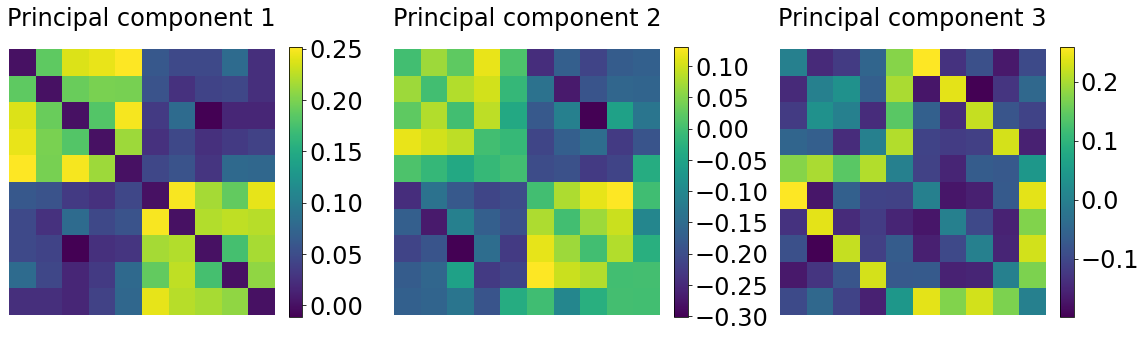

In [8]:
fig = make_figure_4(pca_df, 'replace_this_with_output_path_if_save')

---
## Figure 5: Correlation of model matrix fits with points earned in the task and model-based control

Note here that the statistical values of the correlations are hard-coded in as annotations as opposed to pulled from a software that will be rerun. You can comment out those annotation lines if you prefer not to have them

In [9]:
def make_figure_5(model_mat_fits, grouped_stakes, w1_map_df, output_path, exp):
    """
    Generates the correlation figures for model matrix fits, points earned in the two step task, and the model-based control parameter
    :param model_mat_fits: dataframe containing model matrix fits from the multiple regression from each participant
    :param grouped_stakes: dataframe containing how well each participant did in terms of baseline corrected points earned
    :param w1_map_df: dataframe containing the reinforcement learning model parameters for each participant
    :param output_path: where to save the figure pdf
    :param exp: which experiment you want (1 for initial, 2 for primary results in paper)
    """
    fontsize = 14
    _, talking_heads, _ = set_palettes()
    mpl.rcParams["figure.figsize"] = 4.61, 8.11
    fig_5_merge = pd.merge(model_mat_fits, grouped_stakes, on="subid")
    fig_5_merge = pd.merge(
        fig_5_merge, w1_map_df[["subid", "w low stakes low arm fit"]], on="subid"
    )
    fig_5_merge = fig_5_merge.rename(columns={"w low stakes low arm fit": "w fit"})
    melted_fig_5 = fig_5_merge[
        [
            "subid",
            "Points earned in decision-making task",
            "w fit",
            "Visual cooccurrence",
            "Direct item association",
            "Indirect item association",
        ]
    ].melt(
        id_vars=["subid", "w fit", "Points earned in decision-making task"],
        var_name="Grouping Model",
        value_name="Model Matrix Fit",
    )

    melted_fig_5_round_2 = melted_fig_5.melt(
        id_vars=["subid", "Grouping Model", "Model Matrix Fit"],
        var_name="y_var",
        value_name="y_val",
    )

    g = sns.lmplot(
        data=melted_fig_5_round_2,
        x="Model Matrix Fit",
        y="y_val",
        hue="Grouping Model",
        col="Grouping Model",
        palette=talking_heads,
        row="y_var",
        sharey="row",
        row_order=["Points earned in decision-making task", "w fit"],
        facet_kws={"gridspec_kws": {"wspace": 0.0, "hspace": 0.25}},
    )
    g.fig.set_facecolor("w")
    axes = g.axes
    axes[0, 0].set_ylim(-0.05, 0.11)
    axes[1, 0].set_ylim(0, 1.0)
    titles = [
        "Visual cooccurrence",
        "Direct item association",
        "Indirect item association",
    ]
    for i in range(axes.shape[0]):
        axes[i, 0].set_yticks(np.round(axes[i, 0].get_yticks(), 5))
        axes[i, 0].set_yticklabels(axes[i, 0].get_yticks(), fontsize=fontsize)
        for j in range(axes.shape[1]):
            axes[1, j].set_title("")
            axes[0, j].set_title(titles[j], fontsize=fontsize, y=1.1)
            axes[1, j].set_xlabel(
                r"Model matrix fit ($\bar{\beta}$)", fontsize=fontsize
            )
            round_ticks = [int(x) for x in axes[1, j].get_xticks()]
            axes[1, j].set_xticklabels(round_ticks, fontsize=fontsize)
    axes[0, 0].set_ylabel("Points earned", fontsize=fontsize)
    axes[1, 0].set_ylabel("Model-based control parameter (w)", fontsize=fontsize)
    # adding significance

    if exp == 2:
        # adding actual correlation values
        axes[0, 1].text(
            95,
            -0.03,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[0, 2].text(
            95,
            -0.03,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[1, 1].text(
            95,
            0.1,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[1, 2].text(
            95,
            0.1,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[1, 0].text(
            95,
            0.1,
            "~",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[0, 1].text(
            85, -0.04, r"$r=0.32$", ha="center", color="black", fontsize=fontsize
        )
        axes[0, 2].text(
            85, -0.04, r"$r=0.45$", ha="center", color="black", fontsize=fontsize
        )
        axes[1, 0].text(
            85, 0.04, r"$r=-0.14$", ha="center", color="black", fontsize=fontsize
        )
        axes[1, 1].text(
            85, 0.04, r"$r=0.32$", ha="center", color="black", fontsize=fontsize
        )
        axes[1, 2].text(
            85, 0.04, r"$r=0.46$", ha="center", color="black", fontsize=fontsize
        )
    else:
        axes[0, 1].text(
            80, -0.04, r"$r=0.34$", ha="center", color="black", fontsize=fontsize
        )
        axes[0, 2].text(
            80, -0.04, r"$r=0.36$", ha="center", color="black", fontsize=fontsize
        )
        axes[1, 1].text(
            80, 0.04, r"$r=0.27$", ha="center", color="black", fontsize=fontsize
        )
        axes[1, 2].text(
            80, 0.04, r"$r=0.25$", ha="center", color="black", fontsize=fontsize
        )
        axes[0, 1].text(
            85,
            -0.03,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[0, 2].text(
            85,
            -0.03,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[1, 1].text(
            85,
            0.1,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
        axes[1, 2].text(
            85,
            0.1,
            "*",
            ha="center",
            color="black",
            fontsize=fontsize + 8,
            weight="bold",
        )
    g.fig.text(0.05, 0.90, "A", fontsize=fontsize + 10, color="black", weight="bold")
    g.fig.text(0.05, 0.45, "B", fontsize=fontsize + 10, color="black", weight="bold")
    # uncomment line below to save figure
    # g.savefig(os.path.join(output_path, "Fig5.pdf"), dpi=300)
    return g

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_63/3084439689.py:70: UserWarning: FixedFormatter should only be used together with FixedLoca

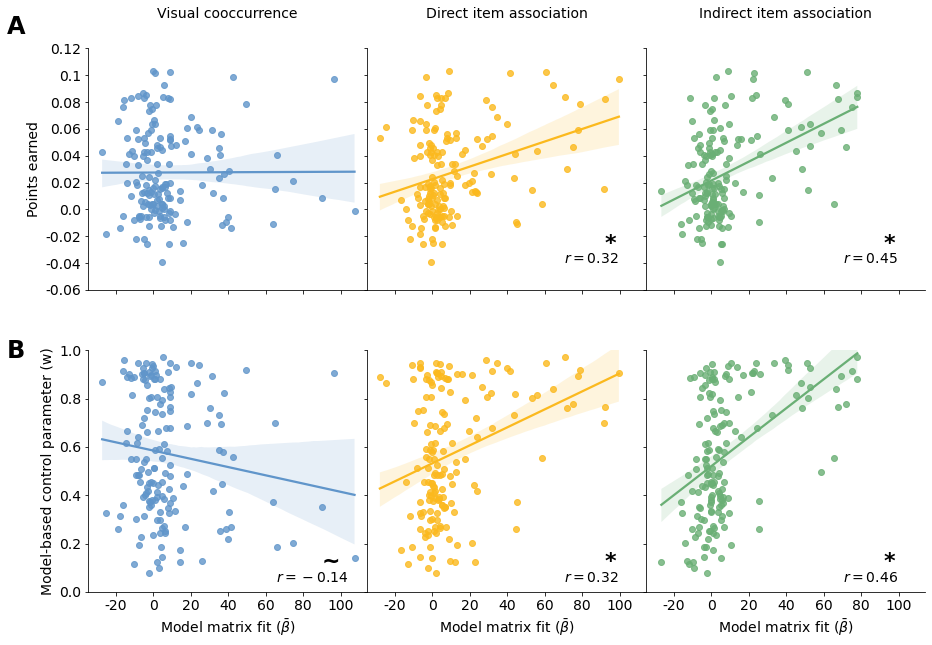

In [10]:
g = make_figure_5(model_mat_fits,grouped_stakes,w1_map_df,'replace_this_with_output_path_if_save',2)

---
## Figure 6: Post-task surprise memory probe

In [11]:
def make_figure_6(dprime_df, output_path):
    """
    Makes the memory figure
    :param dprime_df: dataframe containing memory task performance for each participant
    :param output_path: where to save the figure pdf
    """
    _, _, mem = set_palettes()
    stat_dprime_df = dprime_df.groupby(["subid"]).first().reset_index()
    stat_dprime_df["lbst_diff_score"] = (
        stat_dprime_df["dprime_lbst_high"] - stat_dprime_df["dprime_lbst_low"]
    )
    stat_dprime_df["lt_diff_score"] = (
        stat_dprime_df["dprime_lt_high"] - stat_dprime_df["dprime_lt_low"]
    )
    melted_dprime_df = stat_dprime_df[
        ["subid", "lbst_diff_score", "lt_diff_score"]
    ].melt(id_vars="subid", var_name="type of trial", value_name="d' difference score")

    fontsize = 11
    g = sns.catplot(
        data=melted_dprime_df,
        x="type of trial",
        y="d' difference score",
        height=5,
        palette=mem,
    )
    ax = sns.pointplot(
        data=melted_dprime_df,
        x="type of trial",
        y="d' difference score",
        join=False,
        color="Black",
        scale=0.7,
    )

    plt.setp(ax.lines, zorder=100)
    plt.setp(ax.collections, zorder=100, label="")
    plt.axhline(0, linestyle="--", color="red", zorder=120)
    g.set_xticklabels(["Mismatch d'", "Lure d'"], fontsize=fontsize)
    g.set_xlabels("")
    g.set_ylabels("d' difference score (high vs low stake context)", fontsize=fontsize)
    g.axes[0, 0].set_yticklabels(g.axes[0, 0].get_yticks(), fontsize=fontsize)
    g.axes[0, 0].text(
        0, 3.5, "*", ha="center", color="black", fontsize=fontsize + 8, weight="bold",
    )
    g.fig.set_facecolor("w")
    #uncomment line below if you want to save
    # g.savefig(os.path.join(output_path, "Fig6.pdf"), dpi=300)
    return g

/tmp/ipykernel_63/1295043960.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.axes[0, 0].set_yticklabels(g.axes[0, 0].get_yticks(), fontsize=fontsize)


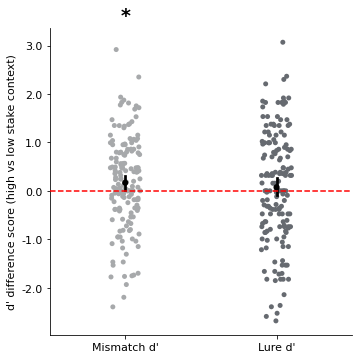

In [12]:
g = make_figure_6(dprime_df,'replace_this_with_output_path_if_save')